In [1]:
import seaborn as sns
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
URL = "http://localhost:5000"

CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
CLASS_LABELS_EMOJIS = ["👿", "🤢" , "😱" , "😊" , "😐 ", "😔" , "😲" ]

In [3]:
response = requests.request("GET", f"{URL}/getDB")
data = response.json()

In [4]:
data["orgStructure"]

{'org1': ['User1', 'User3', 'User2'],
 'org2': ['User8',
  'User9',
  'User5',
  'User10',
  'User11',
  'User6',
  'User4',
  'User7']}

In [5]:
def getSessions(org, user) : 
    for i in data["sessions"] : 
        if i["name"]==user and i["org"]==org : 
            return i["sess"]
    return None

def getSessionData(session) :
    response = requests.request("GET", f"{URL}/getLogs/{session}")
    try : 
        return response.json()
    except Exception as e: 
        print(e)
        return None

def plotEmotionsBySession(session) : 
    d = getSessionData(session)
    if not d : 
        return None
    arr = []
    for i in d : 
        arr.append(CLASS_LABELS[i["class"]])
    return sns.countplot(x=arr).set(title="Session of user")

def multiplotEmotionsByUser(sessions, m, n):
    fig, axes = plt.subplots(m, n, figsize=(5*n, 5*m))
    c = 0
    l = len(sessions)
    for ii in range(m) :
        for ij in range(n) :
            d = getSessionData(sessions[-c-1])
            if not d : 
                continue
            arr = []
            for i in d : 
                arr.append(CLASS_LABELS[i["class"]])
            sns.countplot(x=arr, ax=axes[ii, ij]).set(title=f"Last {c+1}th")
            c += 1
            if c==l :
                return axes
    fig.suptitle(f"Recent {c} sessions of user")
    return axes

In [6]:
sessions = getSessions("org1", "User1")
sessions

['ac209333-a336-498d-bc03-4c98ad942e42',
 'e4487147-94ad-4c1c-af3a-84ac2dfd1140',
 '524d681f-58ce-430f-8402-dd6361079018',
 '86b40bfa-9a49-4ecb-a633-3b36232d7209',
 '6db0d2c6-e719-493d-994f-149d62a65dc6']

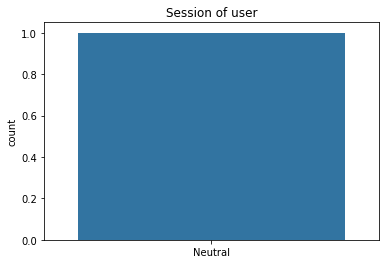

In [7]:
_= plotEmotionsBySession(sessions[1])

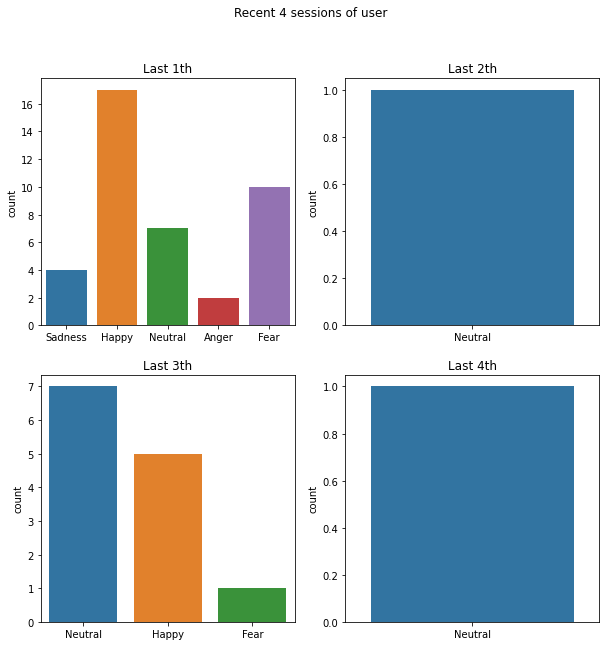

In [8]:
_= multiplotEmotionsByUser(sessions, 2, 2)